In [266]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import step, show

from IPython.display import Image, HTML
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

import requests
import time
import re
import os

## loading data

In [42]:
movies = pd.read_csv(r'/Users/teagannorrgard/ds4001/project3/movieCSVs/allMovies.csv')
movies.head()

,PosterURL,Title,Genre
0,https://a.ltrbxd.com/resized/sm/upload/5b/u9/a...,American Psycho (2000),thriller
1,https://a.ltrbxd.com/resized/film-poster/5/1/7...,Barton Fink (1991),thriller
2,https://a.ltrbxd.com/resized/sm/upload/yt/ae/i...,Black Swan (2010),thriller
3,https://a.ltrbxd.com/resized/sm/upload/ye/jq/f...,Donnie Darko (2001),thriller
4,https://a.ltrbxd.com/resized/sm/upload/sj/00/0...,Enemy (2013),thriller


In [43]:
len(movies)

500

In [5]:
## unused

def path_to_image_html(path):
    return '<img src="'+ path + '" style=max-height:124px;"/>'

HTML(htmlmovies.to_html(escape=False ,formatters=dict(PosterURL=path_to_image_html)))


## downloading images

In [54]:
def download_poster(downloaded_image_dir, title, label, poster_path):
  
    if not os.path.exists(downloaded_image_dir):
        os.makedirs(downloaded_image_dir)
        
    if not os.path.exists(downloaded_image_dir+'/'+label):
        os.makedirs(downloaded_image_dir+'/'+label)

    local_filename = re.sub(r'\W+', ' ', title).lower().strip().replace(" ", "-") + '.jpg'

    try:
        session = requests.Session()
        r = session.get(poster_path, stream=True, verify=False)
        with open(downloaded_image_dir+'/'+label+'/'+local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024):
                f.write(chunk)
    except:
        print('PROBLEM downloading', title,label,poster_path)
    
    time.sleep(1)

In [ ]:
# download image by iterate pandas
for index, row in movies.iterrows():
    download_poster(
        '/Users/teagannorrgard/ds4001/project3/posterimages/',
        str(row['Title']),
        str(row['Genre']),
        row['PosterURL']
    )

In [218]:
import glob
import cv2

thriller_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/thriller/*.jpg")]
comedy_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/comedy/*.jpg")]
family_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/family/*.jpg")]
horror_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/horror/*.jpg")]
romance_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/romance/*.jpg")]
action_posters = [cv2.imread(file) for file in glob.glob("/Users/teagannorrgard/ds4001/project3/posterimages/action/*.jpg")]

In [283]:
## cv2 package reads images as BGR instead of RGB. need to switch back to accurately represent colors

RGB_thriller_posters = []
for img in thriller_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_thriller_posters.append(RGB_img)

RGB_comedy_posters = []
for img in comedy_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_comedy_posters.append(RGB_img)

RGB_family_posters = []
for img in family_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_family_posters.append(RGB_img)

RGB_horror_posters = []
for img in horror_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_horror_posters.append(RGB_img)

RGB_romance_posters = []
for img in romance_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_romance_posters.append(RGB_img)

RGB_action_posters = []
for img in action_posters:
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGB_action_posters.append(RGB_img)

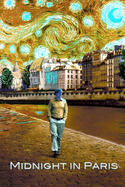

In [306]:
Image.fromarray(romance_posters[70])

## add padding

want to make all images square for CNN

In [307]:
t_image_binaries = []
t_image_colors = []
for image in RGB_thriller_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    t_image_binaries.append(binimg)
    t_image_colors.append(result)

c_image_binaries = []
c_image_colors = []
for image in RGB_comedy_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    c_image_binaries.append(binimg)
    c_image_colors.append(result)

f_image_binaries = []
f_image_colors = []
for image in RGB_family_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    f_image_binaries.append(binimg)
    f_image_colors.append(result)

h_image_binaries = []
h_image_colors = []
for image in RGB_horror_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    h_image_binaries.append(binimg)
    h_image_colors.append(result)

r_image_binaries = []
r_image_colors = []
for image in RGB_romance_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    r_image_binaries.append(binimg)
    r_image_colors.append(result)

a_image_binaries = []
a_image_colors = []
for image in RGB_action_posters:
    color_image = Image.fromarray(image)
    width, height = color_image.size
    new_width = height 
    result = Image.new(color_image.mode, (new_width, height), (0, 0, 255))
    result.paste(color_image, (0, 0))
    binimg = np.array(result)
    a_image_binaries.append(binimg)
    a_image_colors.append(result)
    

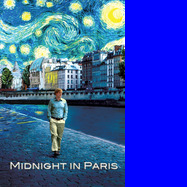

In [313]:
r_image_colors[70]

## make dataframes

In [380]:
## initializing dfs with poster images

thrill = pd.DataFrame(t_image_colors, columns = ["poster"])
com = pd.DataFrame(c_image_colors, columns = ["poster"])
fam = pd.DataFrame(f_image_colors, columns = ["poster"])
horr = pd.DataFrame(h_image_colors, columns = ["poster"])
rom = pd.DataFrame(r_image_colors, columns = ["poster"])
act = pd.DataFrame(a_image_colors, columns = ["poster"])

In [381]:
## adding genre to dfs

thrill['genre'] = 'thriller'
com['genre']  = 'comedy'
fam['genre']  = 'family'
horr['genre']  = 'horror'
rom['genre']  = 'romance'
act['genre']  = 'action'


In [382]:
## making training and testing sets separately
## to ensure model is trained with good representation of each genre

train_thrill = thrill.loc[25:]
test_thrill = thrill.loc[0:24]

train_com = com.loc[25:]
test_com = com.loc[0:24]

train_fam = fam.loc[25:]
test_fam = fam.loc[0:24]

train_horr = horr.loc[25:]
test_horr = horr.loc[0:24]

train_rom = rom.loc[25:]
test_rom = rom.loc[0:24]

train_act = act.loc[25:]
test_act = act.loc[0:24]

In [383]:
trainFrames = [train_thrill, train_com, train_fam, train_horr, train_rom, train_act]
testFrames = [test_thrill, test_com, test_fam, test_horr, test_rom, test_act]

totalFrames = [train_thrill, train_com, train_fam, train_horr, train_rom, train_act,
test_thrill, test_com, test_fam, test_horr, test_rom, test_act]

train = pd.concat(trainFrames, ignore_index=True)
test = pd.concat(testFrames, ignore_index=True)
total = pd.concat(totalFrames, ignore_index=True)

In [384]:
X = total.iloc[:,0].values
y = total.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

## making cnn

###  all genres at once

In [385]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(6,activation = "softmax")])

model

In [335]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(6,activation = "softmax")])

model

In [329]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
model

In [386]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [387]:
model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
40/40 [==============================] - 24s 542ms/step - loss: 31.3331 - acc: 0.1900
Epoch 2/20
40/40 [==============================] - 28s 692ms/step - loss: 1.8921 - acc: 0.2225
Epoch 3/20
40/40 [==============================] - 22s 538ms/step - loss: 2.0871 - acc: 0.1925
Epoch 4/20
40/40 [==============================] - 25s 628ms/step - loss: 1.9799 - acc: 0.2100
Epoch 5/20
40/40 [==============================] - 19s 482ms/step - loss: 1.9098 - acc: 0.2300
Epoch 6/20
40/40 [==============================] - 19s 469ms/step - loss: 1.7707 - acc: 0.2675
Epoch 7/20
40/40 [==============================] - 18s 442ms/step - loss: 1.7723 - acc: 0.2900
Epoch 8/20
40/40 [==============================] - 17s 432ms/step - loss: 1.7165 - acc: 0.2925
Epoch 9/20
40/40 [==============================] - 20s 504ms/step - loss: 1.5774 - acc: 0.3750
Epoch 10/20
40/40 [==============================] - 24s 595ms/step - loss: 1.5143 - acc: 0.4125
Epoch 11/20
40/40 [===================

In [388]:
## third try

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 9.168498992919922
Test accuracy: 0.1899999976158142


In [339]:
y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

4/4 [==============================] - 1s 262ms/step


Text(69.0, 0.5, 'Actual')

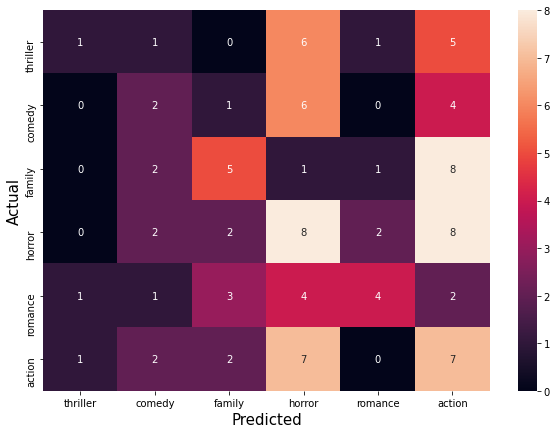

In [340]:
confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['thriller', 'comedy', 'family', 'horror', 'romance', 'action'],
                  columns = ['thriller', 'comedy', 'family', 'horror', 'romance', 'action'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

### comedy v horror

In [354]:
HCFrames = [train_com, train_horr, test_com, test_horr]

HCtotal = pd.concat(HCFrames, ignore_index=True)

In [355]:
X = HCtotal.iloc[:,0].values
y = HCtotal.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

In [356]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")])

model

In [359]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
14/14 [==============================] - 9s 513ms/step - loss: 0.4356 - acc: 0.9571
Epoch 2/15
14/14 [==============================] - 6s 385ms/step - loss: 0.0058 - acc: 1.0000
Epoch 3/15
14/14 [==============================] - 5s 374ms/step - loss: 0.0067 - acc: 1.0000
Epoch 4/15
14/14 [==============================] - 6s 411ms/step - loss: 0.0061 - acc: 1.0000
Epoch 5/15
14/14 [==============================] - 6s 419ms/step - loss: 0.2753 - acc: 0.9786
Epoch 6/15
14/14 [==============================] - 6s 408ms/step - loss: 0.0068 - acc: 1.0000
Epoch 7/15
14/14 [==============================] - 6s 408ms/step - loss: 0.0412 - acc: 0.9929
Epoch 8/15
14/14 [==============================] - 6s 411ms/step - loss: 1.8917 - acc: 0.9429
Epoch 9/15
14/14 [==============================] - 6s 418ms/step - loss: 1.0360e-05 - acc: 1.0000
Epoch 10/15
14/14 [==============================] - 6s 431ms/step - loss: 0.0198 - acc: 1.0000
Epoch 11/15
14/14 [==========================

Test loss: 15.7476806640625
Test accuracy: 0.5
2/2 [==============================] - 0s 48ms/step


Text(69.0, 0.5, 'Actual')

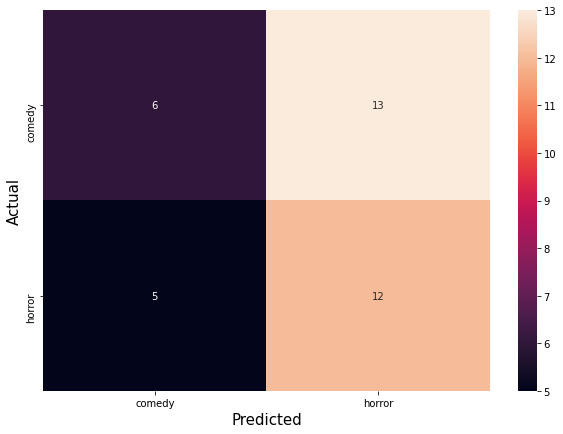

In [360]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['comedy', 'horror'],
                  columns = ['comedy', 'horror'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

In [362]:
print(actual)
print(predicted)

[0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1]


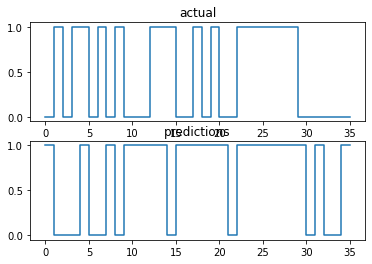

In [361]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import step, show

plt.subplot(2, 1, 1)
plt.title("actual")
xaxis = np.arange(0, len(y_test))
yaxis = actual
step(xaxis, yaxis)

plt.subplot(2, 1, 2)
plt.title('predictions')
xaxis = np.arange(0, len(y_test))
yaxis = predicted
step(xaxis, yaxis)

### family v horror

In [363]:
FCFrames = [train_fam, train_horr, test_fam, test_horr]

FCtotal = pd.concat(FCFrames, ignore_index=True)

X = FCtotal.iloc[:,0].values
y = FCtotal.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

In [364]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")])

model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
15/15 [==============================] - 12s 570ms/step - loss: 328.2954 - acc: 0.5878
Epoch 2/15
15/15 [==============================] - 9s 597ms/step - loss: 5.3530 - acc: 0.6824
Epoch 3/15
15/15 [==============================] - 9s 556ms/step - loss: 1.3688 - acc: 0.8176
Epoch 4/15
15/15 [==============================] - 8s 504ms/step - loss: 0.7007 - acc: 0.8919
Epoch 5/15
15/15 [==============================] - 9s 597ms/step - loss: 0.1898 - acc: 0.9932
Epoch 6/15
15/15 [==============================] - 9s 611ms/step - loss: 0.2290 - acc: 0.9797
Epoch 7/15
15/15 [==============================] - 8s 559ms/step - loss: 0.1525 - acc: 0.9730
Epoch 8/15
15/15 [==============================] - 8s 500ms/step - loss: 0.2575 - acc: 0.9730
Epoch 9/15
15/15 [==============================] - 7s 489ms/step - loss: 0.0822 - acc: 0.9932
Epoch 10/15
15/15 [==============================] - 8s 536ms/step - loss: 0.3093 - acc: 0.9797
Epoch 11/15
15/15 [===========================

Test loss: 5.125215530395508
Test accuracy: 0.6578947305679321
2/2 [==============================] - 0s 79ms/step


Text(69.0, 0.5, 'Actual')

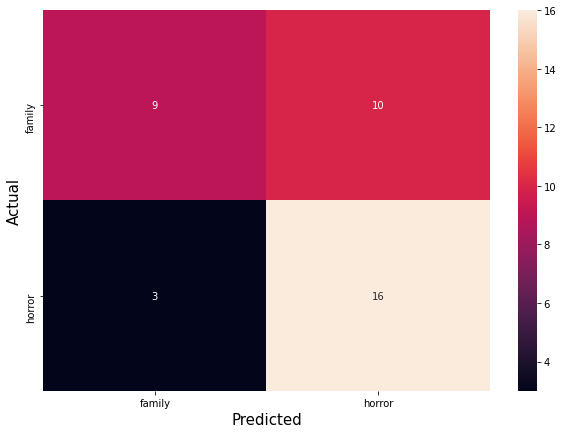

In [365]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['family', 'horror'],
                  columns = ['family', 'horror'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

### thriller v action v horror

In [367]:
TAHFrames = [train_thrill, train_act, train_horr, test_thrill, test_act, test_horr]

TAHtotal = pd.concat(TAHFrames, ignore_index=True)

X = TAHtotal.iloc[:,0].values
y = TAHtotal.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

In [368]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(3,activation = "softmax")])

model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
19/19 [==============================] - 12s 450ms/step - loss: 180.0408 - acc: 0.3529
Epoch 2/15
19/19 [==============================] - 7s 373ms/step - loss: 1.5990 - acc: 0.4813
Epoch 3/15
19/19 [==============================] - 8s 411ms/step - loss: 0.7298 - acc: 0.6898
Epoch 4/15
19/19 [==============================] - 8s 406ms/step - loss: 0.4519 - acc: 0.8396
Epoch 5/15
19/19 [==============================] - 7s 391ms/step - loss: 0.2779 - acc: 0.8877
Epoch 6/15
19/19 [==============================] - 8s 399ms/step - loss: 0.2160 - acc: 0.9572
Epoch 7/15
19/19 [==============================] - 8s 406ms/step - loss: 0.8579 - acc: 0.9412
Epoch 8/15
19/19 [==============================] - 8s 423ms/step - loss: 0.1457 - acc: 0.9679
Epoch 9/15
19/19 [==============================] - 8s 398ms/step - loss: 0.1192 - acc: 0.9786
Epoch 10/15
19/19 [==============================] - 8s 412ms/step - loss: 0.0851 - acc: 0.9786
Epoch 11/15
19/19 [===========================

Test loss: 3.477459192276001
Test accuracy: 0.3404255211353302
2/2 [==============================] - 1s 198ms/step


Text(69.0, 0.5, 'Actual')

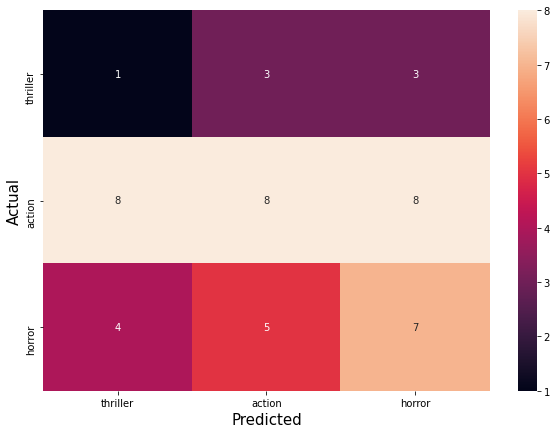

In [369]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['thriller', 'action', 'horror'],
                  columns = ['thriller', 'action', 'horror'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

### romance v action

In [370]:
RAFrames = [train_rom, train_act, test_rom, test_act]

RAtotal = pd.concat(RAFrames, ignore_index=True)

X = RAtotal.iloc[:,0].values
y = RAtotal.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

In [371]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")])

model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
12/12 [==============================] - 7s 377ms/step - loss: 222.6120 - acc: 0.5268
Epoch 2/15
12/12 [==============================] - 5s 373ms/step - loss: 14.3693 - acc: 0.7589
Epoch 3/15
12/12 [==============================] - 4s 363ms/step - loss: 3.8975 - acc: 0.8571
Epoch 4/15
12/12 [==============================] - 4s 350ms/step - loss: 0.7058 - acc: 0.9375
Epoch 5/15
12/12 [==============================] - 4s 360ms/step - loss: 0.8816 - acc: 0.9375
Epoch 6/15
12/12 [==============================] - 5s 378ms/step - loss: 0.2886 - acc: 1.0000
Epoch 7/15
12/12 [==============================] - 5s 394ms/step - loss: 0.2180 - acc: 0.9732
Epoch 8/15
12/12 [==============================] - 5s 382ms/step - loss: 0.1621 - acc: 0.9911
Epoch 9/15
12/12 [==============================] - 5s 384ms/step - loss: 0.0331 - acc: 0.9911
Epoch 10/15
12/12 [==============================] - 5s 390ms/step - loss: 0.2106 - acc: 0.9732
Epoch 11/15
12/12 [===========================

Test loss: 5.988699913024902
Test accuracy: 0.5862069129943848
1/1 [==============================] - 0s 391ms/step


Text(69.0, 0.5, 'Actual')

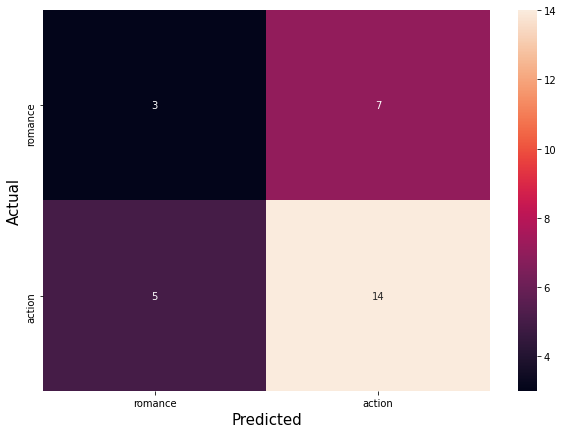

In [372]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['romance', 'action'],
                  columns = ['romance', 'action'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

### romance v horror

In [373]:
RCFrames = [train_rom, train_horr, test_rom, test_horr]

RCtotal = pd.concat(RCFrames, ignore_index=True)

X = RCtotal.iloc[:,0].values
y = RCtotal.iloc[:,1].values

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

arrList = []
for image in X:
    new = np.asarray(image)
    arrList.append(new)

finalX = np.asarray(arrList)

X_train, X_test, y_train, y_test = train_test_split(finalX, Y, test_size=0.2, random_state=0)

In [374]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (187,187,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")])

model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
15/15 [==============================] - 8s 379ms/step - loss: 471.2941 - acc: 0.5342
Epoch 2/15
15/15 [==============================] - 6s 383ms/step - loss: 19.2936 - acc: 0.6233
Epoch 3/15
15/15 [==============================] - 6s 369ms/step - loss: 2.4361 - acc: 0.8014
Epoch 4/15
15/15 [==============================] - 6s 388ms/step - loss: 1.0142 - acc: 0.8836
Epoch 5/15
15/15 [==============================] - 6s 390ms/step - loss: 0.7775 - acc: 0.9315
Epoch 6/15
15/15 [==============================] - 6s 401ms/step - loss: 0.2751 - acc: 0.9863
Epoch 7/15
15/15 [==============================] - 6s 401ms/step - loss: 0.0865 - acc: 1.0000
Epoch 8/15
15/15 [==============================] - 6s 409ms/step - loss: 0.1771 - acc: 0.9795
Epoch 9/15
15/15 [==============================] - 7s 437ms/step - loss: 0.2347 - acc: 0.9726
Epoch 10/15
15/15 [==============================] - 6s 414ms/step - loss: 0.0713 - acc: 1.0000
Epoch 11/15
15/15 [===========================

Test loss: 8.799479484558105
Test accuracy: 0.5945945978164673
2/2 [==============================] - 1s 78ms/step


Text(69.0, 0.5, 'Actual')

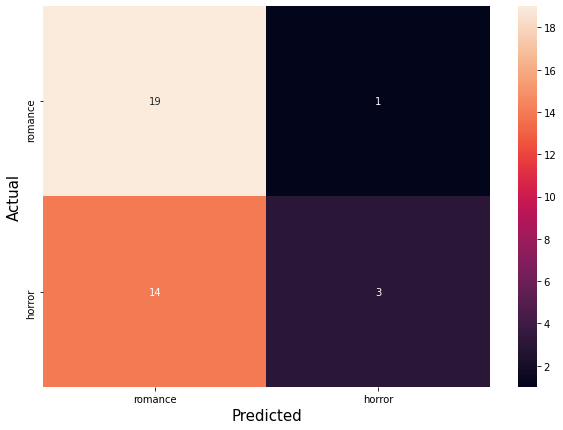

In [375]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

confMatrix = confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(confMatrix, index = ['romance', 'horror'],
                  columns = ['romance', 'horror'])
plt.figure(figsize = (10,7))
heat = sn.heatmap(df_cm, annot=True)
heat.set_xlabel('Predicted', fontsize=15)
heat.set_ylabel('Actual', fontsize=15)

In [376]:
print(actual)
print(predicted)

[0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
